# K_means算法实战

## 简单聚类

数据集为20个啤酒，酒的属性包括:calories(卡路里)、sodium(钠)、alcohol(酒精)、cost

In [1]:
import pandas as pd

In [2]:
# beer dataset
beer = pd.read_csv('data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


由于不需要标签y，所以只需要设置X就可以:

In [3]:
X = beer[["calories","sodium","alcohol","cost"]]

创建两个kmeans模型，聚类簇数分别设置为3和2。

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=3).fit(X)

.labels_属性可以表示所有数据所属的簇:

In [6]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2],
      dtype=int32)

In [7]:
km2 = KMeans(n_clusters=2).fit(X)

In [8]:
km2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
      dtype=int32)

In [9]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0
4,Heineken,152,11,5.0,0.77,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
10,Coors,140,18,4.6,0.44,0,0


观察对应聚类的数据差异：

In [10]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,0
1,70.00,10.5,2.600000,0.420000,1
2,102.75,10.0,4.075000,0.440000,1


In [11]:
beer.groupby('cluster2').mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,150.000000,17.000000,4.521429,0.520714,0.000000
1,91.833333,10.166667,3.583333,0.433333,1.666667


## 可视化

把聚类后的数据画出来，同时画出每个类的特征均值(下面只画两个特征Calories和Alcohol):

In [12]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [13]:
centers = beer.groupby("cluster").mean().reset_index()

In [14]:
colors = np.array(['red', 'green', 'blue', 'yellow'])

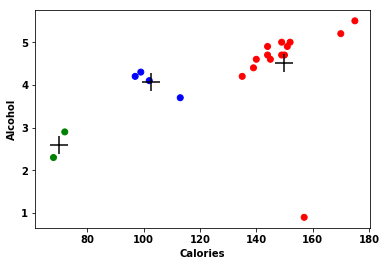

In [15]:
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster"]])

plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel("Calories")
plt.ylabel("Alcohol")
plt.show()

从图中可以发现有三类数据，最左边只有两个样本，中间有四个样本，最右边的类样本最多。

这里只看到两类特征，如果想看所有的两两特征，就可以画个简单的散点图:

In [16]:
from pandas.plotting import scatter_matrix

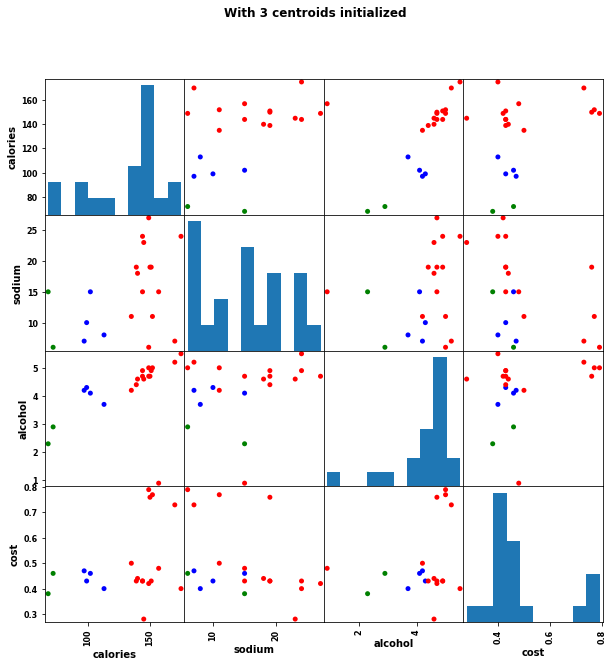

In [17]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, 
               alpha=1,c=colors[beer["cluster"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")
plt.show()

 X轴有四个属性，Y轴有四个属性，对角线是数据的分布。

接下来看两个簇的效果:

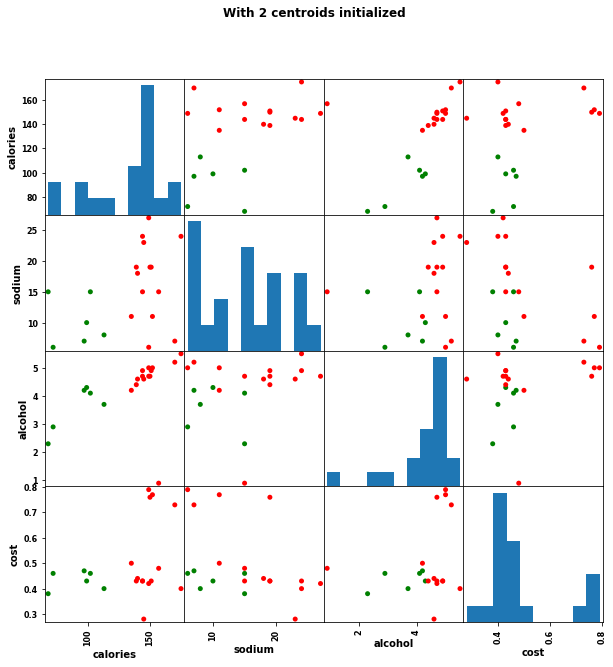

In [18]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, 
               alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")
plt.show()

可以通过观察图来判断两个簇好还是三个簇好。

## 标准化/归一化

接下来对数据进行标准化或者归一化(消除数据之间的差异性，聚类之前基本上都要这么做):

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X = X.astype(float)
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

再对处理过的数据进行聚类，得到新的散点图:

In [21]:
km = KMeans(n_clusters=3).fit(X_scaled)

In [22]:
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
0,Budweiser,144,15,4.7,0.43,0,0,0
1,Schlitz,151,19,4.9,0.43,0,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0,0
16,Hamms,139,19,4.4,0.43,0,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0,0
6,Augsberger,175,24,5.5,0.40,0,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0,0
10,Coors,140,18,4.6,0.44,0,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,1,1
12,Michelob_Light,135,11,4.2,0.50,0,0,1


In [23]:
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,148.375,21.125,4.7875,0.4075,0.00,0.00
1,105.375,10.875,3.3250,0.4475,1.25,0.75
2,155.250,10.750,4.9750,0.7625,0.00,0.00


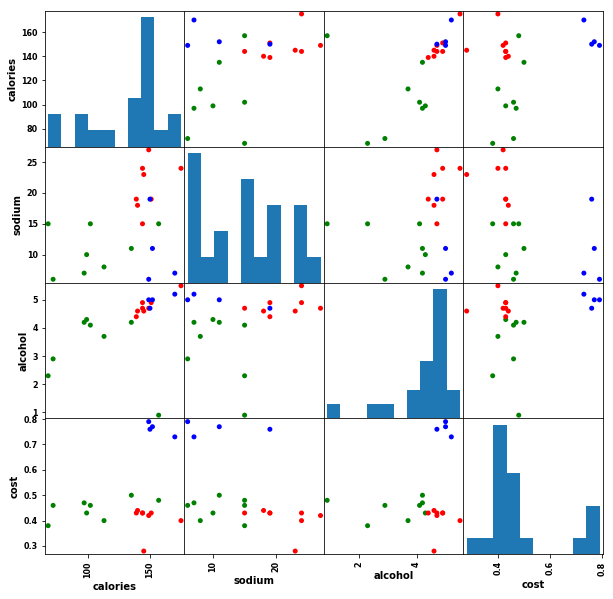

In [24]:
scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)
plt.show()

在处理标准化之前，发现calories比较重要(值比较大)，cost不太重要。处理之后，就是同样重要。

## 聚类评估(轮廓系数Silhouette Coefficient)

![](https://github.com/pchen12567/picture_store/blob/master/Interview/k_means_08.png?raw=true)

- 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
- 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}


* si接近1，则说明样本i聚类合理
* si接近-1，则说明样本i更应该分类到另外的簇
* 若si 近似为0，则说明样本i在两个簇的边界上。

对标准化前后的数据进行轮廓系数计算:

In [25]:
from sklearn import metrics

In [26]:
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X,beer.cluster)
print(score_scaled, score)

0.17978068089399363 0.6731775046455792


可以发现，做标准化的结果比较低，不做标准化的结果比较高。这是因为特征的重要性是不知道的，将calories的重要度通过标准化降低之后可能会造成不好的影响。

要确定簇数量k，可以进行遍历:

In [27]:
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.6917656034079485,
 0.6731775046455792,
 0.5857040721127799,
 0.43557160672658357,
 0.45591821670133814,
 0.43776116697963163,
 0.38946337473126047,
 0.3974640517242733,
 0.39156974092452423,
 0.3413109618039683,
 0.34597752371275525,
 0.3122143924843148,
 0.3070778214477033,
 0.31834561839139464,
 0.2849514001174895,
 0.2349807733307197,
 0.1588091017496327,
 0.08423051380156171]

选择轮廓系数比较大的，所以选择了k=2。

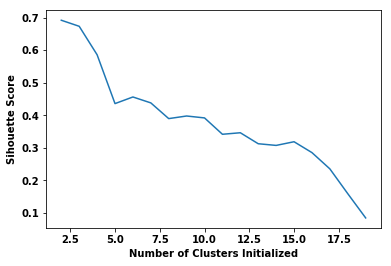

In [28]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
plt.show()